In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import matplotlib as mpl
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

# Set the default font family to Liberation Sans
font_path = '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf'
plt.rcParams['font.family'] = 'Liberation Sans'
plt.rcParams['font.sans-serif'] = ['Liberation Sans']

# Reading the data

In [2]:
df = pd.read_csv("shopping_dataset_with_labels.csv")

# replacing whitespaces
df['Predicted_Category'] = df['Predicted_Category'].str.replace(' ', '') 
df['Predicted_Category'] = df['Predicted_Category'].str.replace('&', 'and')
df.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Quantity,Avg_Price,...,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct,Predicted_Category,cluster
0,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,1,153.71,...,Used,0.1,2019-01-01,4500,2424.5,1,ELEC10,10.0,homeandkitchen,7.0
1,17850,M,Chicago,12,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,1,153.71,...,Used,0.1,2019-01-01,4500,2424.5,1,ELEC10,10.0,homeandkitchen,7.0
2,17850,M,Chicago,12,16696,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,2,122.77,...,Not Used,0.1,2019-01-01,4500,2424.5,1,ELEC10,10.0,homeandkitchen,7.0
3,17850,M,Chicago,12,16699,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,1,81.50,...,Clicked,0.1,2019-01-01,4500,2424.5,1,ELEC10,10.0,homeandkitchen,7.0
4,17850,M,Chicago,12,16700,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,1,153.71,...,Clicked,0.1,2019-01-01,4500,2424.5,1,ELEC10,10.0,homeandkitchen,7.0


# Removal of product categories

Since the majority of the customers bought Tees, Home \& Kitchen, and Office supplies, it may be best to remove these product categories since they may introduce noise to our clusters.

In [3]:
df_features = df[~df['Predicted_Category'].isin([
                                        # Very few bought
                                        'GiftCards' 
                                        # A lot customers bought
                                        ,'homeandkitchen'
                                        ,'Tees'
                                        ,'office'
        ])]
df_features.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Quantity,Avg_Price,...,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct,Predicted_Category,cluster
2172,17850,M,Chicago,12,16704,2019-01-01,GGOEGAPB058615,Google Women's Yoga Jacket Black,1,108.31,...,Used,0.18,2019-01-01,4500,2424.5,1,SALE10,10.0,sportsandfitness,7.0
2174,17850,M,Chicago,12,16715,2019-01-01,GGOEYAFB073115,YouTube Men's Fleece Hoodie Black,1,57.76,...,Used,0.18,2019-01-01,4500,2424.5,1,SALE10,10.0,HoodiesandJackets,7.0
2179,12583,M,Chicago,33,16693,2019-01-01,GGOEGATB060415,Google Women's Quilted Insulated Vest Black,1,61.89,...,Clicked,0.18,2019-01-01,4500,2424.5,1,SALE10,10.0,HoodiesandJackets,1.0
2185,12583,M,Chicago,33,16695,2019-01-01,GGOEGAFJ036214,Google Men's Pullover Hoodie Grey,1,42.91,...,Clicked,0.18,2019-01-01,4500,2424.5,1,SALE10,10.0,HoodiesandJackets,1.0
2186,12583,M,Chicago,33,16695,2019-01-01,GGOEGAYC068324,Google Youth Short Sleeve T-shirt Royal Blue,1,15.67,...,Clicked,0.18,2019-01-01,4500,2424.5,1,SALE10,10.0,KidsApparel,1.0


In [4]:
def purchase_multiplier(row):
    qty = row['Quantity']
    cat = row['Predicted_Category']

    total = [cat] * qty

    return ' '.join(total)

df_features["Purchases"] = df_features.apply(purchase_multiplier, axis=1)
df_features.head()

/tmp/ipykernel_69886/1733026480.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features["Purchases"] = df_features.apply(purchase_multiplier, axis=1)


,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Quantity,Avg_Price,...,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct,Predicted_Category,cluster,Purchases
2172,17850,M,Chicago,12,16704,2019-01-01,GGOEGAPB058615,Google Women's Yoga Jacket Black,1,108.31,...,0.18,2019-01-01,4500,2424.5,1,SALE10,10.0,sportsandfitness,7.0,sportsandfitness
2174,17850,M,Chicago,12,16715,2019-01-01,GGOEYAFB073115,YouTube Men's Fleece Hoodie Black,1,57.76,...,0.18,2019-01-01,4500,2424.5,1,SALE10,10.0,HoodiesandJackets,7.0,HoodiesandJackets
2179,12583,M,Chicago,33,16693,2019-01-01,GGOEGATB060415,Google Women's Quilted Insulated Vest Black,1,61.89,...,0.18,2019-01-01,4500,2424.5,1,SALE10,10.0,HoodiesandJackets,1.0,HoodiesandJackets
2185,12583,M,Chicago,33,16695,2019-01-01,GGOEGAFJ036214,Google Men's Pullover Hoodie Grey,1,42.91,...,0.18,2019-01-01,4500,2424.5,1,SALE10,10.0,HoodiesandJackets,1.0,HoodiesandJackets
2186,12583,M,Chicago,33,16695,2019-01-01,GGOEGAYC068324,Google Youth Short Sleeve T-shirt Royal Blue,1,15.67,...,0.18,2019-01-01,4500,2424.5,1,SALE10,10.0,KidsApparel,1.0,KidsApparel


# Combining the categories bought by the customer

Preprocessing step before TF-IDF vectorization. In this case:

* Document = Customer and their purchase history
* Corpus = Collection of customers and their corresponding purchase history.

In [5]:
df_combined_categories = (
                            df_features
                            .groupby('CustomerID')
                            ['Purchases']
                            .apply(lambda x: ' '.join(x))
                            .reset_index()
)
df_combined_categories.head()

,CustomerID,Purchases
0,12347,KidsApparel HoodiesandJackets bagsandluggage b...
1,12348,KidsApparel KidsApparel sportsandfitness Drink...
2,12350,CapsandHats CapsandHats CapsandHats CapsandHat...
3,12356,sportsandfitness KidsApparel KidsApparel KidsA...
4,12359,CapsandHats


# TF-IDF vectorization of the product category

We treat the TF-IDF score as the ``customer's interest of a product category``. The advantage of using TF-IDF is that it assigns higher weights to products that are frequently bought by a customer but rarely bought in the entire dataset. We are hoping to get clusters that buy from rarely bought product categories.

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Apply TF-IDF vectorization
tfidf_matrix = tfidf_vectorizer.fit_transform(df_combined_categories['Purchases'])

# Convert the TF-IDF matrix to a DataFrame for better readability
tfidf_df = pd.DataFrame(tfidf_matrix.toarray()
                        ,columns=tfidf_vectorizer.get_feature_names_out()
                        ,index=df_combined_categories['CustomerID'])
tfidf_df.head()

,bagsandluggage,beautyandhealth,capsandhats,carandmotorbike,drinkware,hoodiesandjackets,kidsapparel,onesie,petsupplies,sportsandfitness
CustomerID,,,,,,,,,,
12347,0.649687,0.000000,0.190407,0.0,0.683360,0.179499,0.105328,0.0,0.0,0.177079
12348,0.000000,0.000000,0.000000,0.0,0.729847,0.000000,0.026643,0.0,0.0,0.683091
12350,0.000000,0.000000,0.955157,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.296100
12356,0.139746,0.299875,0.000000,0.0,0.342975,0.270269,0.792956,0.0,0.0,0.266626
12359,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000


# We standardize the TF-IDF scores

In [7]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data simultaneously
X = scaler.fit_transform(tfidf_df.to_numpy())

# Clustering

In this step, we train various K-Means clustering models with various values of $K$ (the number of clusters) in order to get the optimal number of clusters that best separates the customers.

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Store the evaluation scores
inertia = []
silhouette_scores = []
ch_score = []
davies_bouldin_scores = []

# Try several K number of clusters
k_values = range(4, 20)
for k in k_values:
    print(f"k = {k}")

    # Storing the raw scores for each model
    inertia_samples = []
    silhouette_score_samples = []
    ch_score_samples = []
    db_score_samples = []

    # Cluster 15 times to get the average evaluation scores later on
    for _ in range(15):
        print(f"\tj = {_}")
        
        # Clustering Step
        kmeans = KMeans(n_clusters=k, 
                        init='k-means++', 
                        algorithm='elkan',
                        n_init=10)
        kmeans.fit(X)

        # Getting the cluster labels
        labels = kmeans.labels_

        # Get the Inertia (for elbow method)
        inertia_samples.append(kmeans.inertia_)
    
        # Get the Silhouette score
        silhouette_score_samples.append(silhouette_score(X, labels))

        # Calinski-Harabasz score 
        ch_score_samples.append(calinski_harabasz_score(X, labels))
        
        # Davies Bouldin Score
        db_score_samples.append(davies_bouldin_score(X, labels))


    # Mean of the metrics
    inertia.append(inertia_samples)
    silhouette_scores.append(silhouette_score_samples)
    ch_score.append(ch_score_samples)
    davies_bouldin_scores.append(db_score_samples)

k = 4
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
	j = 10
	j = 11
	j = 12
	j = 13
	j = 14
k = 5
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
	j = 10
	j = 11
	j = 12
	j = 13
	j = 14
k = 6
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
	j = 10
	j = 11
	j = 12
	j = 13
	j = 14
k = 7
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
	j = 10
	j = 11
	j = 12
	j = 13
	j = 14
k = 8
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
	j = 10
	j = 11
	j = 12
	j = 13
	j = 14
k = 9
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
	j = 10
	j = 11
	j = 12
	j = 13
	j = 14
k = 10
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
	j = 10
	j = 11
	j = 12
	j = 13
	j = 14
k = 11
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
	j = 10
	j = 11
	j = 12
	j = 13
	j = 14
k = 12
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8


Text(0.5, 1.0, 'Davies Bouldin Score (ideal: close to zero)')

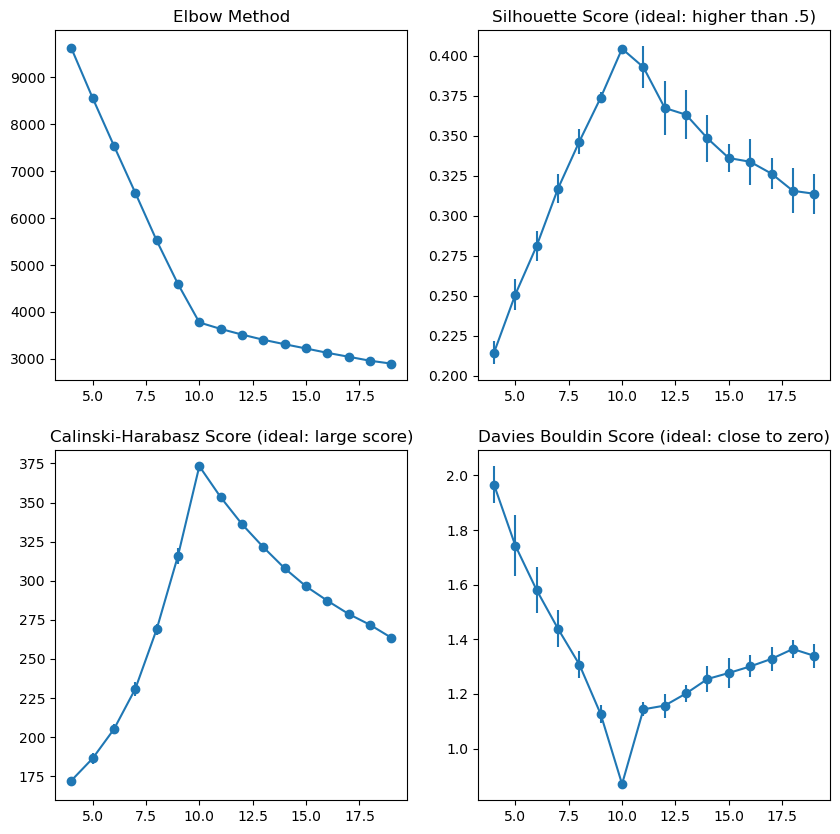

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].plot(k_values, np.mean(inertia, axis=1), linestyle='-', marker='o')
axs[0, 0].errorbar(k_values, np.mean(inertia, axis=1), yerr = np.std(inertia, axis=1, ddof=1), fmt ='none')
axs[0, 0].set_title('Elbow Method')

axs[0, 1].plot(k_values, np.mean(silhouette_scores, axis=1), linestyle='-', marker='o')
axs[0, 1].errorbar(k_values, np.mean(silhouette_scores, axis=1), yerr = np.std(silhouette_scores, axis=1, ddof=1), fmt ='none')
axs[0, 1].set_title('Silhouette Score (ideal: higher than .5)')

axs[1, 0].plot(k_values, np.mean(ch_score, axis=1), linestyle='-', marker='o')
axs[1, 0].errorbar(k_values, np.mean(ch_score, axis=1), yerr = np.std(ch_score, axis=1, ddof=1), fmt ='none')
axs[1, 0].set_title('Calinski-Harabasz Score (ideal: large score)')

axs[1, 1].plot(k_values, np.mean(davies_bouldin_scores, axis=1), linestyle='-', marker='o')
axs[1, 1].errorbar(k_values, np.mean(davies_bouldin_scores, axis=1), yerr = np.std(davies_bouldin_scores, axis=1, ddof=1), fmt ='none')
axs[1, 1].set_title('Davies Bouldin Score (ideal: close to zero)')

### We focus only on the Elbow method. Treat the other metrics as support/confirmation.

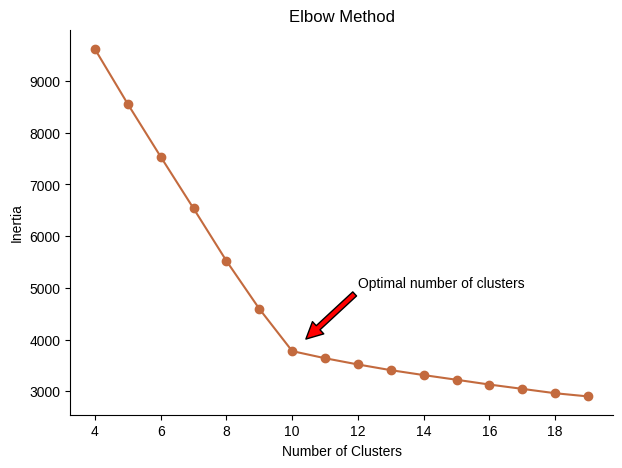

In [170]:
# Elbow method only
fig, ax = plt.subplots(figsize=(7, 5), dpi=100)

ax.plot(k_values, np.mean(inertia, axis=1), color="#C36A3E", linestyle='-', marker='o')
ax.errorbar(k_values, np.mean(inertia, axis=1), yerr = np.std(inertia, axis=1, ddof=1), fmt ='none', color="#C36A3E")

# Annotation
ax.annotate('Optimal number of clusters', xy=(10.4, 4000), xytext=(12, 5000),
            arrowprops=dict(facecolor='red', shrink=0.01))

ax.set_title('Elbow Method')
ax.set_xlabel("Number of Clusters")
ax.set_ylabel("Inertia")
ax.spines[['right', 'top']].set_visible(False)
plt.savefig("elbow_kmeans.jpg", dpi=300);

In K-means clustering, an elbow means we have found the optimal number of clusters (k=10 in our case).

### Silhouette Score

### Final K-Means model. We choose K=10

In [10]:
kmeans = KMeans(n_clusters=10, 
                init='k-means++', 
                algorithm='elkan',
                n_init=10)
kmeans.fit(X)

# We attach the cluster labels to the tfidf dataframe (features)
tfidf_df['cluster'] = kmeans.labels_
tfidf_df.head()

,bagsandluggage,beautyandhealth,capsandhats,carandmotorbike,drinkware,hoodiesandjackets,kidsapparel,onesie,petsupplies,sportsandfitness,cluster
CustomerID,,,,,,,,,,,
12347,0.649687,0.000000,0.190407,0.0,0.683360,0.179499,0.105328,0.0,0.0,0.177079,9
12348,0.000000,0.000000,0.000000,0.0,0.729847,0.000000,0.026643,0.0,0.0,0.683091,0
12350,0.000000,0.000000,0.955157,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.296100,4
12356,0.139746,0.299875,0.000000,0.0,0.342975,0.270269,0.792956,0.0,0.0,0.266626,5
12359,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,4


In [172]:
pd.Series(kmeans.labels_).value_counts()

3    402
1    192
9    142
0    133
4    107
2    103
5    101
7     66
8     51
6     38
Name: count, dtype: int64

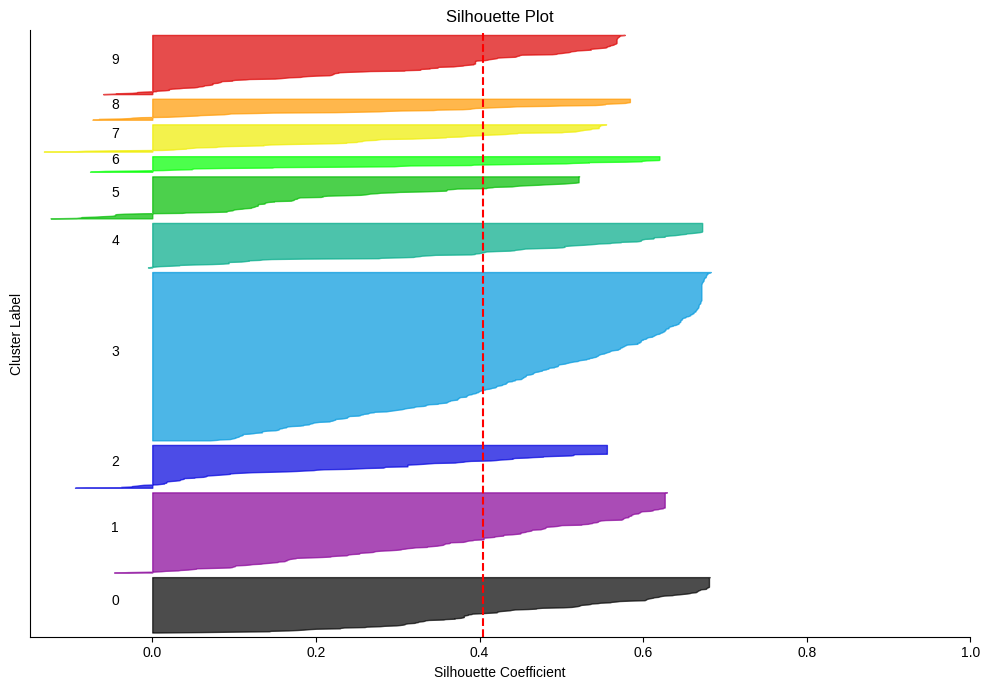

In [192]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

def silhouette_plot():
    cluster_labels = kmeans.labels_
    n_clusters = len(np.unique(cluster_labels))
    silhouette_avg = silhouette_score(X, cluster_labels)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    # Create a subplot with 1 row and 1 column
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(10, 7)
    
    # Set limits for the plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    # Initialize the y-axis position for the first silhouette plot
    y_lower = 10
    
    # Loop through each cluster and plot the silhouette values
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
    
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
    
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
    
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
        y_lower = y_upper + 10
    
    # Draw the average silhouette score as a vertical line
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    ax1.set_title("Silhouette Plot")
    ax1.set_xlabel("Silhouette Coefficient")
    ax1.set_ylabel("Cluster Label")
    
    ax1.set_yticks([])  # Clear the y-axis labels
    ax1.set_xticks(np.arange(-0.2, 1.2, 0.2))
    ax1.set_xlim(-0.15, 1)
    fig.tight_layout()
    plt.savefig("silhouette.jpg", dpi=300);

silhouette_plot()

# Determining the Interests

In [11]:
df_counts = pd.pivot_table(df[['CustomerID', 'Predicted_Category']]
                           ,index='CustomerID'
                           ,columns = 'Predicted_Category'
                           ,aggfunc='size'
                           ,fill_value=0)

for col in df_counts.columns:
    df_counts[col] = np.where(df_counts[col] > 0, 1, 0)

df_counts = pd.merge(df_counts, tfidf_df[['cluster']], how='left', left_index=True, right_index=True)
df_counts.head()

,CapsandHats,Drinkware,GiftCards,HoodiesandJackets,KidsApparel,Tees,bagsandluggage,beautyandhealth,carandmotorbike,homeandkitchen,office,onesie,petsupplies,sportsandfitness,cluster
CustomerID,,,,,,,,,,,,,,,
12346,0,0,0,0,0,1,0,0,0,0,1,0,0,0,NaN
12347,1,1,0,1,1,1,1,0,0,1,1,0,0,1,9.0
12348,0,1,0,0,1,1,0,0,0,1,1,0,0,1,0.0
12350,1,0,0,0,0,1,0,0,0,1,0,0,0,1,4.0
12356,0,1,0,1,1,1,1,1,0,1,1,0,0,1,5.0


### Number of customers per cluster

''

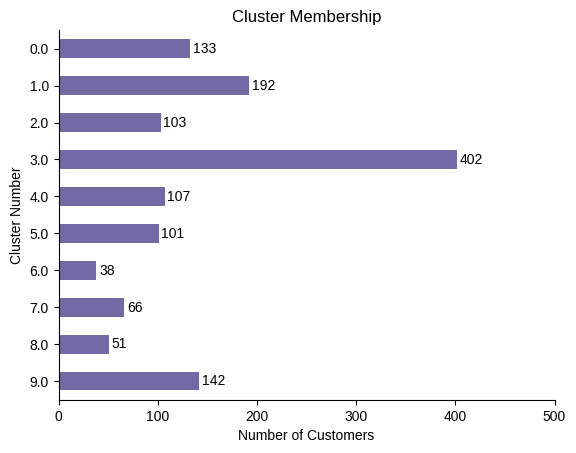

In [140]:
ax = (df_counts["cluster"]
      .value_counts()
      .sort_index(ascending=False)
      .plot(kind="barh", title='Cluster Membership', color="#7369a5"))
ax.bar_label(ax.containers[0], padding=2)
ax.set_xlim(0, 500)
ax.set_xlabel("Number of Customers")
ax.set_ylabel("Cluster Number")
ax.spines[['right', 'top']].set_visible(False)

fig = plt.gcf()
fig.set_dpi(100)  
;

In [18]:
df_counts["cluster"].value_counts().sort_index()

cluster
0.0    133
1.0    192
2.0    103
3.0    402
4.0    107
5.0    101
6.0     38
7.0     66
8.0     51
9.0    142
Name: count, dtype: int64

# Save the model locally for future use

In [60]:
from joblib import dump

dump(kmeans, 'kmeans_model_final.joblib')

['kmeans_model_final.joblib']

# Interests per cluster

In [14]:
interest_df = df_counts.groupby('cluster').mean().round(2)
interest_df

,CapsandHats,Drinkware,GiftCards,HoodiesandJackets,KidsApparel,Tees,bagsandluggage,beautyandhealth,carandmotorbike,homeandkitchen,office,onesie,petsupplies,sportsandfitness
cluster,,,,,,,,,,,,,,
0.0,0.40,0.60,0.05,0.42,0.35,0.92,0.44,0.39,0.14,0.89,0.85,0.13,0.16,1.00
1.0,0.42,0.59,0.07,0.44,0.29,0.88,0.44,1.00,0.13,0.94,0.76,0.08,0.11,0.45
2.0,0.39,0.54,0.04,1.00,0.25,0.88,0.31,0.33,0.10,0.81,0.66,0.10,0.13,0.50
3.0,0.50,1.00,0.06,0.61,0.46,0.92,0.58,0.41,0.21,0.91,0.89,0.22,0.25,0.60
4.0,1.00,0.49,0.06,0.45,0.23,0.89,0.35,0.40,0.10,0.88,0.76,0.07,0.09,0.41
5.0,0.43,0.48,0.01,0.50,1.00,0.83,0.36,0.21,0.09,0.83,0.71,0.14,0.18,0.43
6.0,0.39,0.42,0.03,0.37,0.55,0.84,0.29,0.11,0.03,0.84,0.63,1.00,0.13,0.34
7.0,0.47,0.74,0.08,0.61,0.44,0.88,0.56,0.48,0.15,0.91,0.88,0.21,1.00,0.59
8.0,0.51,0.45,0.04,0.43,0.33,0.90,0.43,0.37,1.00,0.94,0.75,0.18,0.12,0.41


In cluster 0, 40% of the customers bought caps and hats, 60% bought drinkware, etc. We apply a threshold of 70% for determining a cluster's interest(s).

In [15]:
# Save to CSV
interest_df.to_csv("customer_segmentation.csv")

# Value Segmentation

In [74]:
df_value = df[["Transaction_Date", "CustomerID", 'Quantity', 'Avg_Price']]
df_value["Total_Spent"] = df_value["Quantity"] * df_value["Avg_Price"]
df_value['Transaction_Date'] = pd.to_datetime(df_value['Transaction_Date'])
df_value['Year_Month'] = df_value['Transaction_Date'].dt.to_period('M')

df_value.head()

/tmp/ipykernel_69886/21699595.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_value["Total_Spent"] = df_value["Quantity"] * df_value["Avg_Price"]
/tmp/ipykernel_69886/21699595.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_value['Transaction_Date'] = pd.to_datetime(df_value['Transaction_Date'])
/tmp/ipykernel_69886/21699595.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

,Transaction_Date,CustomerID,Quantity,Avg_Price,Total_Spent,Year_Month
0,2019-01-01,17850,1,153.71,153.71,2019-01
1,2019-01-01,17850,1,153.71,153.71,2019-01
2,2019-01-01,17850,2,122.77,245.54,2019-01
3,2019-01-01,17850,1,81.50,81.50,2019-01
4,2019-01-01,17850,1,153.71,153.71,2019-01


In [75]:
df_value["Year_Month"].value_counts().sort_index()

Year_Month
2019-01    4063
2019-02    3284
2019-03    4346
2019-04    4150
2019-05    4572
2019-06    4193
2019-07    5251
2019-08    6150
2019-09    4288
2019-10    4164
2019-11    3961
2019-12    4502
Freq: M, Name: count, dtype: int64

### Histogram of Total Spent

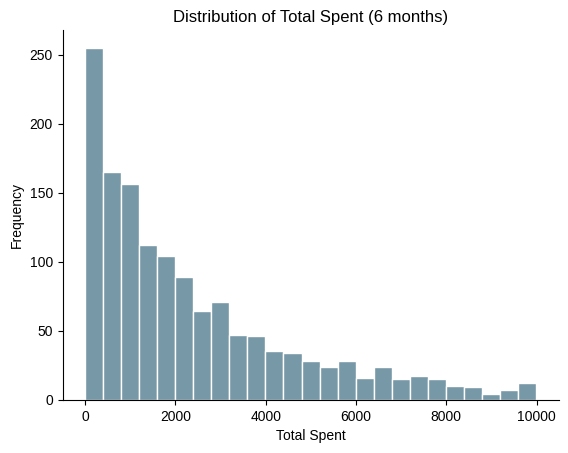

In [193]:
df_value_hist = df_value[["CustomerID", "Total_Spent"]].groupby("CustomerID").sum()

ax = df_value_hist.query("Total_Spent <= 10000").plot(kind="hist"
                                                    ,bins=25
                                                    ,title="Distribution of Total Spent (6 months)"
                                                    ,edgecolor = "w"
                                                    ,color="#7798A7"
                                                    ,legend=False
                                                    ,xlabel="Total Spent")
ax.spines[['right', 'top']].set_visible(False)
plt.savefig("Total_Spent_dist.jpg", dpi=300);

### We take the total amount spent of each customer for the past 6 months.

We use the following rules to define the Customer Value Segment
* Inactive (I): no purchase activity in the past 6 months
* Low (L): 0 < Amount Spent 6mos <= 250 USD
* Mid (M): 250 < Amount Spent 6mos <= 1000
* High (H): 1000 < Amount Spent 6mos <= 3000
* Very High (VH): Amount Spent 6mos > 3000

In [110]:
df_value_segmentation = (
                            df_value
                            .query("Year_Month > '2019-06'")
                            [["CustomerID", "Total_Spent"]]
                            .groupby(["CustomerID"])
                            .sum()
                            .rename(columns={"Total_Spent": "Total_Spent_6mos"})
                        )

def cust_val_seg(amount):
    if 0 < amount <= 250:
        return 'Low'
    elif 250 < amount <= 1000:
        return 'Mid'
    elif 1000 < amount <= 3000:
        return 'High'
    else:
        return 'Very High'

# Apply the function to create a new column
df_value_segmentation['Customer_Value_Segment'] = df_value_segmentation['Total_Spent_6mos'].apply(cust_val_seg)
df_value_segmentation.head()

,Total_Spent_6mos,Customer_Value_Segment
CustomerID,,
12346,30.99,Low
12347,2618.85,High
12348,665.09,Mid
12350,1360.07,High
12356,1442.47,High


### We put the interest segment and customer value segment together in a single dataframe.

In [119]:
df_segments = (
                pd.merge(df_counts.fillna(-1)["cluster"], df_value_segmentation[["Customer_Value_Segment"]]
                        ,how="left"
                        ,left_index=True ,right_index=True)
                .rename(columns={"cluster": "Interest_Segment"})
                .reset_index(drop=False)
    
)

df_segments["Customer_Value_Segment"] = df_segments["Customer_Value_Segment"].fillna("Inactive")
df_segments.head()

,CustomerID,Interest_Segment,Customer_Value_Segment
0,12346,-1.0,Low
1,12347,9.0,High
2,12348,0.0,Mid
3,12350,4.0,High
4,12356,5.0,High


''

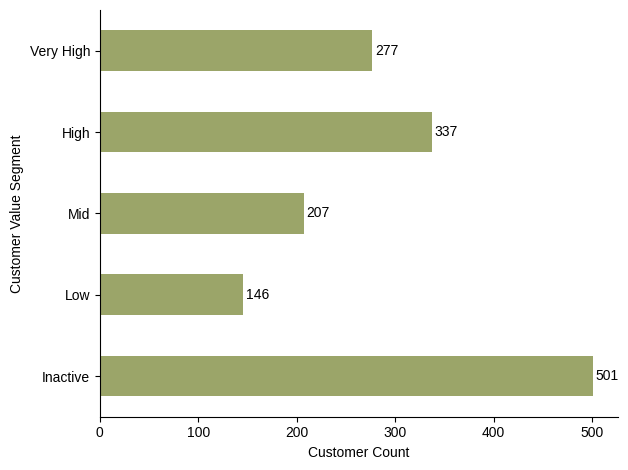

In [161]:
df_segments_bar = (df_segments
                   [["CustomerID", "Customer_Value_Segment"]]
                   .groupby("Customer_Value_Segment")
                   .count())

# Define the desired order of the indices
desired_order = ["Inactive", 'Low', 'Mid', 'High', "Very High"]

# Re-ordering the index
df_segments_bar = df_segments_bar.reindex(desired_order)

# Plot
ax = df_segments_bar.plot(kind="barh"
                    ,xlabel="Customer Count"
                    ,ylabel="Customer Value Segment"
                    ,legend=False
                    ,color="#9BA569")
ax.bar_label(ax.containers[0], padding=2)
plt.tight_layout()
plt.savefig("Customer_ValSeg_counts.jpg", dpi=300);
;

### Cross tabulation of Interest and Customer Value Segments

In [127]:
segmentation_table = df_segments.pivot_table(columns="Interest_Segment"
                                            ,index="Customer_Value_Segment"
                                            ,values='CustomerID'
                                            ,aggfunc='count'
                                            ,fill_value=0)
segmentation_table.columns.name = None
segmentation_table.index.name = None

# Define the desired order of the indices
desired_order = ["Inactive", 'Low', 'Mid', 'High', "Very High"]

# Reindex the pivot table
segmentation_table = segmentation_table.reindex(desired_order)
segmentation_table.head()

,-1.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
Inactive,66,42,20,39,137,29,55,19,20,11,63
Low,38,14,7,12,28,13,9,8,4,7,6
Mid,23,20,27,19,44,17,17,6,14,8,12
High,6,31,75,22,90,32,11,1,19,16,34
Very High,0,26,63,11,103,16,9,4,9,9,27


In [128]:
# Save results to a CSV file
segmentation_table.to_csv("segmentation_table.csv")